# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [27]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Food was lousy. Who ever is pl...
1,✅ Trip Verified | Had the worst experience. Th...
2,✅ Trip Verified | The ground staff were not h...
3,✅ Trip Verified | Second time BA Premium Econ...
4,Not Verified | They changed our Flights from ...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Checking DataFrame Null & duplicated values

In [28]:
# Checking DataFrame infos and null rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [29]:
# Checking basic statistics of the "reviews" column
df['reviews'].describe()

count                                                  1000
unique                                                 1000
top       Not Verified |  Food was lousy. Who ever is pl...
freq                                                      1
Name: reviews, dtype: object

In [30]:
# Checking for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [31]:
# Counting the number of reviews
review_count = df['reviews'].count()
print("Total number of reviews:", review_count)

Total number of reviews: 1000


**We have 1000 reviews (no null or duplicated ones)**

## Cleaning reviews | Remove Prefix

In [32]:
# Finding the length of each review
df['review_length'] = df['reviews'].str.len()
df.head()

,reviews,review_length
0,Not Verified | Food was lousy. Who ever is pl...,541
1,✅ Trip Verified | Had the worst experience. Th...,681
2,✅ Trip Verified | The ground staff were not h...,383
3,✅ Trip Verified | Second time BA Premium Econ...,544
4,Not Verified | They changed our Flights from ...,733


In [33]:
# Remove '✅ Trip Verified | '
def remove_prefix(review):
    prefix = '✅ Trip Verified | '
    if review.startswith(prefix):
        return review[len(prefix):]
    else:
        return review

# Applying the function to the "reviews" column
df['reviews'] = df['reviews'].apply(remove_prefix)

# Displaying the dataframe with the prefix removed
print(df)


                                               reviews  review_length
0    Not Verified |  Food was lousy. Who ever is pl...            541
1    Had the worst experience. The flight from Lond...            681
2     The ground staff were not helpful. Felt like ...            383
3     Second time BA Premium Economy in a newer air...            544
4    Not Verified |  They changed our Flights from ...            733
..                                                 ...            ...
995   Delhi to London. Having read many negative re...           1269
996  When you travel British Airways its like you a...           1417
997   British Airways gets plenty of well deserved ...            351
998   BA First Class is not even that any more. Sta...           1120
999   Linate to London. The morning of the departur...           1219

[1000 rows x 2 columns]


In [34]:
# Remove '✅ Trip Verified | '
def remove_prefix(review):
    prefix = 'Not Verified | '
    if review.startswith(prefix):
        return review[len(prefix):]
    else:
        return review

# Applying the function to the "reviews" column
df['reviews'] = df['reviews'].apply(remove_prefix)

# Displaying the dataframe with the prefix removed
print(df)

                                               reviews  review_length
0     Food was lousy. Who ever is planning the Asia...            541
1    Had the worst experience. The flight from Lond...            681
2     The ground staff were not helpful. Felt like ...            383
3     Second time BA Premium Economy in a newer air...            544
4     They changed our Flights from Brussels to Lon...            733
..                                                 ...            ...
995   Delhi to London. Having read many negative re...           1269
996  When you travel British Airways its like you a...           1417
997   British Airways gets plenty of well deserved ...            351
998   BA First Class is not even that any more. Sta...           1120
999   Linate to London. The morning of the departur...           1219

[1000 rows x 2 columns]


## Performing sentiment analysis on reviews

In [35]:
from textblob import TextBlob

df['sentiment_polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [36]:
# Filtering reviews based on certain criteria
positive_reviews = df[df['sentiment_polarity'] > 0]
positive_reviews

,reviews,review_length,sentiment_polarity,sentiment_subjectivity
3,Second time BA Premium Economy in a newer air...,544,0.388106,0.622727
5,At Copenhagen the most chaotic ticket counter...,207,0.150000,0.566667
8,LHR check in was quick at the First Wing and ...,1775,0.111402,0.470758
14,I enjoyed my flight. The boarding was swift a...,401,0.258750,0.560000
15,Why do you make it so hard? After a so so loun...,543,0.037058,0.389962
...,...,...,...,...
994,Mumbai to London Heathrow. Disappointing expe...,904,0.072283,0.421377
995,Delhi to London. Having read many negative re...,1269,0.140086,0.388985
996,When you travel British Airways its like you a...,1417,0.172007,0.445910
997,British Airways gets plenty of well deserved ...,351,0.357500,0.565000


In [37]:
positive_reviews = df[df['sentiment_polarity'] > 0.5]
positive_reviews.count()

reviews                   21
review_length             21
sentiment_polarity        21
sentiment_subjectivity    21
dtype: int64

In [38]:
# Filtering reviews based on certain criteria
negative_reviews = df[df['sentiment_polarity'] < 0]
negative_reviews

,reviews,review_length,sentiment_polarity,sentiment_subjectivity
0,Food was lousy. Who ever is planning the Asia...,541,-0.104375,0.353333
1,Had the worst experience. The flight from Lond...,681,-0.003333,0.633333
2,The ground staff were not helpful. Felt like ...,383,-0.216667,0.266667
4,They changed our Flights from Brussels to Lon...,733,-0.119583,0.480833
6,Worst experience of my life trying to deal wi...,990,-0.062321,0.557798
...,...,...,...,...
984,London to Madrid. Lazy seat allocation has le...,617,-0.039966,0.435374
986,London to Tehran back in August 2017. The cab...,668,-0.096296,0.337037
990,Johannesburg to Heathrow. British Airways are...,555,-0.062500,0.441667
992,British Airways changed plane and consequentl...,790,-0.103125,0.206250


In [39]:
# Filtering reviews based on certain criteria
negative_reviews = df[df['sentiment_polarity'] < 0.5]
negative_reviews.count()

reviews                   978
review_length             978
sentiment_polarity        978
sentiment_subjectivity    978
dtype: int64

## Pie Chart Visualization

In [40]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['sentiment_polarity'].apply(vader_analysis)
df.head()

,reviews,review_length,sentiment_polarity,sentiment_subjectivity,Analysis
0,Food was lousy. Who ever is planning the Asia...,541,-0.104375,0.353333,Negative
1,Had the worst experience. The flight from Lond...,681,-0.003333,0.633333,Negative
2,The ground staff were not helpful. Felt like ...,383,-0.216667,0.266667,Negative
3,Second time BA Premium Economy in a newer air...,544,0.388106,0.622727,Neutral
4,They changed our Flights from Brussels to Lon...,733,-0.119583,0.480833,Negative


In [41]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     652
Negative    326
Positive     22
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f941d2c1650>,
 [Text(-0.5055378774171093, 0.9769500777913905, 'Neutral'),
  Text(0.4368627590942414, -1.0095300538946659, 'Negative'),
  Text(1.3467768923514833, -0.09323090811571783, 'Positive')],
 [Text(-0.275747933136605, 0.5328818606134856, '65.2%'),
  Text(0.238288777687768, -0.5506527566698177, '32.6%'),
  Text(0.8479706359250079, -0.05870094214693343, '2.2%')])

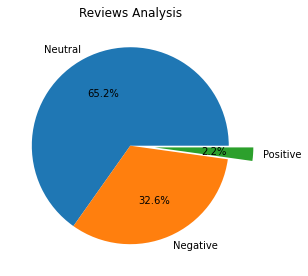

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Scatter plot Visualization

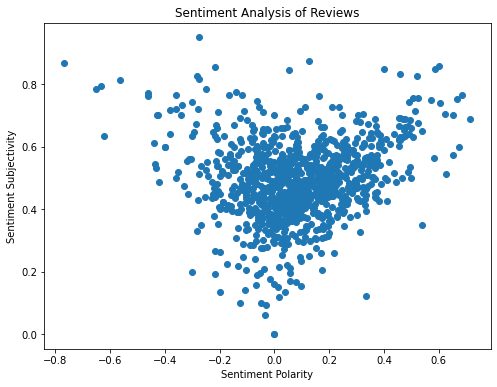

In [43]:
import matplotlib.pyplot as plt
import pandas as pd


# Creating a scatter plot for sentiment polarity and subjectivity
plt.figure(figsize=(8, 6))
plt.scatter(df['sentiment_polarity'], df['sentiment_subjectivity'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Reviews')
plt.show()


The scatter plot helps visualize the distribution of sentiment polarity and subjectivity in the reviews. 
- Positive sentiment polarity values will be towards the right.
- Negative sentiment polarity values towards the left
- Higher sentiment subjectivity values towards the top (focuses on a personal interpretation not facts)
- If subjectivity < 0.5, the sentence is more subjective than objective and vice versa.

We can conclude that there are: 
- 666 reviews with a positive sentiment but only 21 reviews with a sentiment polarity above 0.5
- 326  reviews with a negative sentiment 
- Looking at the sentiment analysis of reviews we can see that most of the reviews are in the middle which makes it hard to determine if they are + or _ 

## Wordclouds Visualization

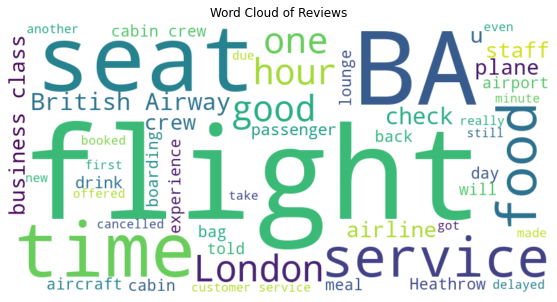

In [44]:
from wordcloud import WordCloud

# Concatenate all the reviews into a single string
reviews_text = ' '.join(df['reviews'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


The worldcloud shows word that need to be removed because they do not help in categorising reviews into a good or bad review.

### Use stopwords to remove typical english words

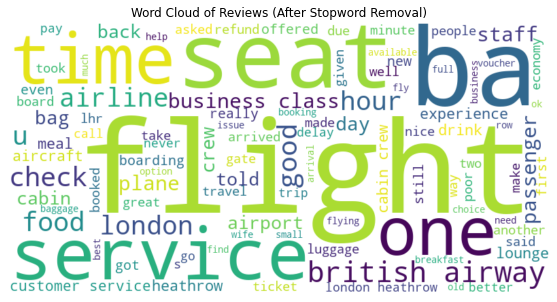

In [45]:
from nltk.corpus import stopwords

# Tokenize the text into individual words
words = reviews_text.split()

# Convert the words to lowercase
words = [word.lower() for word in words]

# Load the stop words from NLTK
stop_words = set(stopwords.words('english'))

# Filter out the stop words
words = [word for word in words if word not in stop_words]

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews (After Stopword Removal)')
plt.show()


In [46]:
# Create a dictionary to store the word frequencies
word_freq = {}
for word in words:
    if word not in word_freq:
        word_freq[word] = 0
    word_freq[word] += 1

# Convert the word frequencies dictionary to a dataframe
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the words by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
print(word_freq_df.head(20))



         Word  Frequency
54     flight       1360
122        ba        952
214   service        534
55     london        439
0        food        432
141      crew        429
46       seat        422
192       one        388
86    british        378
578     would        368
140     cabin        367
71      staff        366
673         -        359
475  business        352
24        get        341
50       good        336
121      time        336
36      seats        326
476     class        326
13         us        295


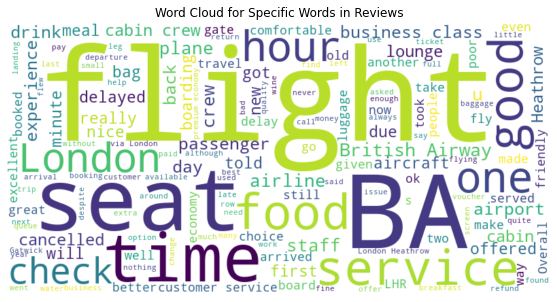

In [47]:
# List of words to create word cloud for
words_to_include = ['enjoy', 'nice', 'love', 'beautiful', 'excellent', 'beautiful', 'good', 'relaxing', 'amazing', 'comfortable','uncomfortable', 'dissapointing','bad','delay','delayed','cancelled','terrible','missing']

# Filter the reviews to only include those that contain the words of interest
reviews_filtered = df[df['reviews'].str.contains('|'.join(words_to_include), case=False)]

# Concatenate the filtered reviews into a single string
reviews_text = ' '.join(reviews_filtered['reviews'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Specific Words in Reviews')
plt.show()


## Extracte Keywords from reviews

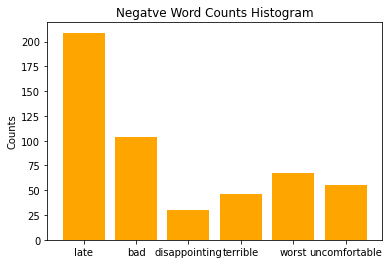

In [48]:
# Extracting negative keyword from reviews
import re

df['late'] = df['reviews'].str.extract(r'(late)', flags=re.IGNORECASE)
late_count = df['late'].count()

df['bad'] = df['reviews'].str.extract(r'(bad)', flags=re.IGNORECASE)
bad_count = df['bad'].count()

df['disappointing'] = df['reviews'].str.extract(r'(disappointing)', flags=re.IGNORECASE)
disappointing_count = df['disappointing'].count()

df['worst'] = df['reviews'].str.extract(r'(worst)', flags=re.IGNORECASE)
worst_count = df['worst'].count()

df['terrible'] = df['reviews'].str.extract(r'(terrible)', flags=re.IGNORECASE)
terrible_count = df['terrible'].count()

df['uncomfortable'] = df['reviews'].str.extract(r'(uncomfortable)', flags=re.IGNORECASE)
uncomfortable_count = df['uncomfortable'].count()

bad_words = ['late','bad','disappointing','terrible','worst','uncomfortable']
count_list = [late_count, bad_count, disappointing_count,terrible_count, worst_count, uncomfortable_count]

plt.bar(bad_words, count_list, color="orange")
plt.ylabel('Counts')
plt.title('Negatve Word Counts Histogram')
plt.show()

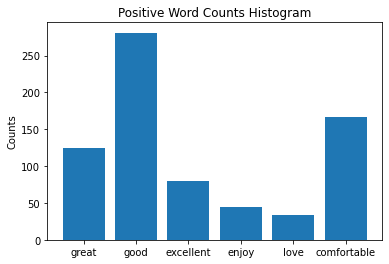

In [49]:
# Extracting positive keyword from reviews
df['great'] = df['reviews'].str.extract(r'(great)', flags=re.IGNORECASE)
great_count = df['great'].count()

df['good'] = df['reviews'].str.extract(r'(good)', flags=re.IGNORECASE)
good_count = df['good'].count()

df['excellent'] = df['reviews'].str.extract(r'(excellent)', flags=re.IGNORECASE)
excellent_count = df['excellent'].count()

df['enjoy'] = df['reviews'].str.extract(r'(enjoy)', flags=re.IGNORECASE)
enjoy_count = df['enjoy'].count()

df['love'] = df['reviews'].str.extract(r'(love)', flags=re.IGNORECASE)
love_count = df['love'].count()

df['comfortable'] = df['reviews'].str.extract(r'(comfortable)', flags=re.IGNORECASE)
comfortable_count = df['comfortable'].count()

good_words = ['great','good','excellent','enjoy','love','comfortable']
count_list2 = [great_count, good_count, excellent_count, enjoy_count, love_count, comfortable_count]

plt.bar(good_words, count_list2)
plt.ylabel('Counts')
plt.title('Positive Word Counts Histogram')
plt.show()